<p style="color:#153462; 
          font-weight: bold; 
          font-size: 30px; 
          font-family: Gill Sans, sans-serif; 
          text-align: center;">
          Decision Tree Classifier with Scikit Learn</p>

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

<p style="color:#3C4048; 
          font-weight: bold; 
          font-size: 18px; 
          font-family: Gill Sans, sans-serif;">
          Loading the Iris Flower Data:</p>

In [3]:
 # as_frame loads the data as frame
iris = load_iris(as_frame=True)

In [4]:
df = iris.data
df["target"] = iris.target
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
117,7.7,3.8,6.7,2.2,2
49,5.0,3.3,1.4,0.2,0
17,5.1,3.5,1.4,0.3,0
101,5.8,2.7,5.1,1.9,2
84,5.4,3.0,4.5,1.5,1


In [8]:
# Only selecting petal length and petal width for our demo purpose
X = df[["petal length (cm)", "petal width (cm)"]].values
y = df["target"].values

<p style="color:#3C4048; 
          font-weight: bold; 
          font-size: 18px; 
          font-family: Gill Sans, sans-serif;">
          Building Decision Tree:</p>

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       <b> Parameters and their usage: </b>
       <ul>
           <li><code>criterion</code>, Tells about which impurity method used.</li>
           <li><code>max_depth</code>, Tells about how deep the tree can be. The more splits it has and it captures more information about the data. Having more splits might leads overfitting</li>
           <li><code>random_state=42</code>, It helps in getting result same every time. </li>
       </ul>
   </font>
</p>

In [10]:
tree_clf = DecisionTreeClassifier(criterion="gini", max_depth=2, random_state=42,)

In [11]:
# Fitting data into the model
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

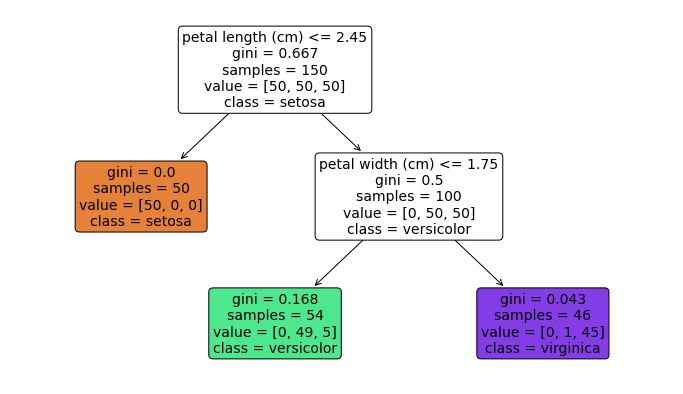

In [38]:
features_used = df.columns[2:4].values
plt.figure(figsize=(12, 7))
plot_tree(
    tree_clf,
    feature_names=features_used,
    filled=True,
    class_names=iris.target_names,
    rounded=True,
    fontsize=14,
    )
plt.show()

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
    We will try to understand above tree graph in simple terms. Here our classification of iris flower starts with <b><i>root</i></b> node(depth 0, at the top). Here we will check whether petal length(cm) is less than or equal to 2.45 or not. If it is less than or equal to 2.45 then it will move to the left <b><i>child</i></b>(depth 1). In this case, it is a leaf node(i.e it does not have any child nodes) and predicted as Iris Setosa(class=setosa). If it is greater than 2.45 then it will move right node (depth 1) and it has 2 children. If petal width is less or equal to 1.75 then it most likely versicolor if not then it is virginica.<br><br>
       We will try to understand attributes which are inside each node:<br>
<b>samples</b>: This attribute counts how many training instances it applies to. For example, 50 training example less than 2.45 cm of petal width in left node(depth 1) <br>
<b>value</b>: This attribute tells us how many training instances of each class this node applies to. For example in bottom-right node value represents 0 setosa, 1 versicolor and 45 virginica.<br>
<b>gini</b>: A node's gini attribute measures impurity. A node is pure(gini=0) if all training instances it applies to belong to the same class. For example in the left node of depth 1, the node represent a single class called setosa.<br><br>
       Scikit-Learn uses the Classification and Regression Tree (CART) algorithms, which produces only binary trees:nonleaf nodes always have two children(i.e questions only have yes/no answeres). However other algorithms such as ID3 can produce Decision Tress with nodes that have more than two children.
   </font>
</p>

<p style="color:#3C4048; 
          font-weight: bold; 
          font-size: 18px; 
          font-family: Gill Sans, sans-serif;">
          Estimating Class Probabilities:</p>

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
    A Decision Tree can also estimate the probability that an instance belongs to a perticular class k. First it traverse the tree to find the leaf node for this instance, and then it returns the ratio of training instances of class k in this node.
   </font>
</p>

In [40]:
# 0% Iris Setosa, 90.7% Iris Versicolor, 9.3% for Iris Virginica
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [41]:
tree_clf.predict([[5, 1.5]])

array([1])